### **Exercise: Analyzing Distribution Plots**  
**Objective:** Apply statistical visualization techniques to analyze the distribution of a dataset.  

#### **Step 1: Collect the Data**  
The following data give the failure times for n = 88 radio transceivers: 

```
 16 224 16 80 96 536 400 80
 392 576 128 56 656 224 40 32
 358 384 256 246 328 464 448 716
 304 16 72 8 80 72 56 608
 108 194 136 224 80 16 424 264
 156 216 168 184 552 72 184 240
 438 120 308 32 272 152 328 480
 60 208 340 104 72 168 40 152
 360 232 40 112 112 288 168 352
 56 72 64 40 184 264 96 224
 168 168 114 280 152 208 160 176
```

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from frequency_table_lib import StatsDescriptive

In [2]:
data = np.array(
    [
    16, 224, 16, 80, 96, 536, 400, 80,
    392, 576, 128, 56, 656, 224, 40, 32,
    358, 384, 256, 246, 328, 464, 448, 716,
    304, 16, 72, 8, 80, 72, 56, 608,
    108, 194, 136, 224, 80, 16, 424, 264,
    156, 216, 168, 184, 552, 72, 184, 240,
    438, 120, 308, 32, 272, 152, 328, 480,
    60, 208, 340, 104, 72, 168, 40, 152,
    360, 232, 40, 112, 112, 288, 168, 352,
    56, 72, 64, 40, 184, 264, 96, 224,
    168, 168, 114, 280, 152, 208, 160, 176,
    ]
)

In [3]:
data.size

88

In [4]:
statsD = StatsDescriptive(data)

INTERVAL                       x                  f             xf            (x-X̄)^2      (x-X̄)^2 * f       fr             F         
----------------------------------------------------------------------------------------------------------------------------------
[8.00, 110.00)                 59.00              29            1711.00       23041.86      668213.94       0.330           29        
[110.00, 212.00)               161.00             23            3703.00       2479.59       57030.51        0.261           52        
[212.00, 314.00)               263.00             16            4208.00       2725.31       43605.03        0.182           68        
[314.00, 416.00)               365.00             9             3285.00       23779.04      214011.38       0.102           77        
[416.00, 518.00)               467.00             5             2335.00       65640.77      328203.85       0.057           82        
[518.00, 620.00)               569.00             4      

In [5]:
statsD.summary_MCT()

Mean: 210.80, Median: 168.00, Mode: [ 72 168]


In [6]:
statsD.summary_MD()

Range: 708.00, Variance: 26001.14
Standard Derivation: 161.2486898530926, Coefficient of Variation: 76.50


In [7]:
statsD.summary_MS()

Skewness: 1.05, Kurtosis: 0.60


#### **Step 2: Histogram and Polygon plot**  
Visualize the distribution of the dataset using a histogram and polygon. 

In [8]:
def plot_custom_histogram(intervals:np.array, 
                          frequencies:np.array,
                          edgecolor:str=("white"),
                          title:str=("Custom Histogram"),
                          figsize:tuple=(10,6)) -> None:
    # Define size bar
    widths = np.diff(intervals)
    # create a color gradient based on frequency
    cmap = plt.cm.Blues  # You can change to "Reds", "Greens", "Purples", etc.
    norm = plt.Normalize(min(frequencies), max(frequencies))
    colors = [cmap(norm(f)) for f in frequencies]
    # Create the histogram
    plt.figure(figsize=figsize)
    plt.bar(intervals[:-1], 
            frequencies, 
            width=widths, 
            color=colors, 
            edgecolor=edgecolor, 
            align='edge')
    
    # Customization
    plt.title(title)
    plt.xlabel("Intervals")
    plt.ylabel("Frequency")
    plt.xticks(intervals, rotation=0)
    #plt.grid(False)  # Uncomment if you want remove grid
    # Add a color bar for the scale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ax=plt.gca())  # Specify the current axis
    cbar.set_label("Frequency Intensity")  # Color bar label
    # Show the plot
    plt.show()

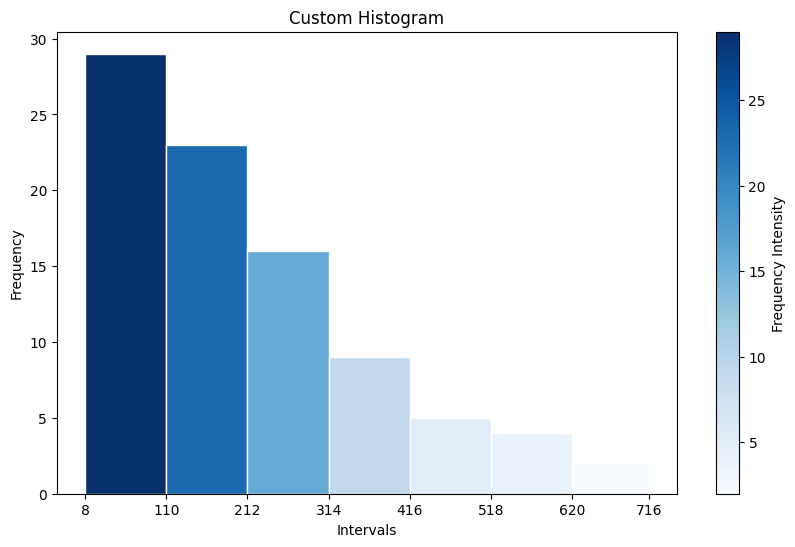

In [9]:
plot_custom_histogram(statsD.intervals,statsD.abs_frequency, title="Custom Histogram")

In [10]:
def plot_custom_polygon(frequencies:np.array,
                          midpoints:np.array,
                          color:str=("#007acc"),
                          title:str=("Custom Polygon"),
                          figsize:tuple=(9,5)) -> None:
    # Define seaborn style
    sns.set(style="whitegrid")
    # Create the polygon
    plt.figure(figsize=figsize)
    # plot the polygon with smooth line and color
    sns.lineplot(x=midpoints, y=frequencies, marker="o", markersize=8, lw=2.5, color=color, label="Polygon")
    # Smooth curve with a interpolation
    x_smooth = np.linspace(midpoints.min(), midpoints.max(), 300)
    y_smooth = np.interp(x_smooth, midpoints, frequencies)
    plt.fill_between(x_smooth, y_smooth, color=color, alpha=0.5)
    # Labels
    plt.title(title)
    plt.xlabel("Midpoints")
    plt.ylabel("Frequency")
    # Add labels to the points
    for i, txt in enumerate(frequencies):
        plt.annotate(txt, (midpoints[i], frequencies[i]), textcoords="offset points", xytext=(0,10), ha='center')
    # Show the plot
    plt.legend()
    plt.show()

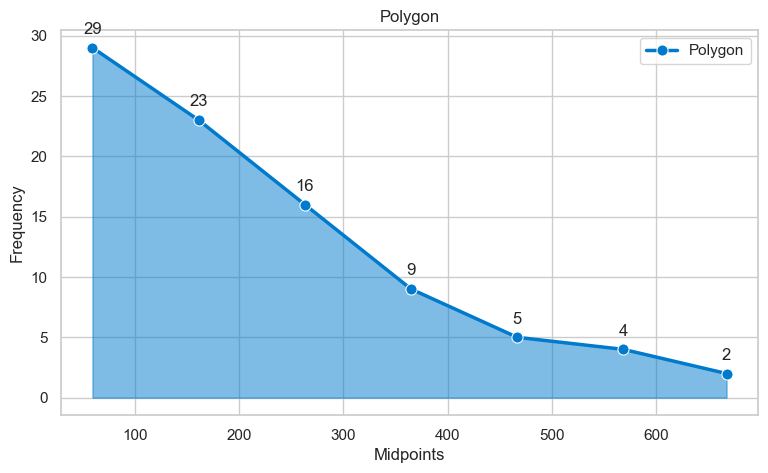

In [11]:
plot_custom_polygon(statsD.abs_frequency, statsD.midpoints, title="Polygon")

- The distribution is positively skewed, in the summary of the Measures of Central Tendency we can see.
 `Mean: 210.80, Median: 168.00, Mode: [ 72 168]` *Mean > Median > Mode*. We find high values at the beginning. As the intervals progress, the frequency decreases.

#### **Step 3: Box Plot (Box-and-Whisker Plot)**  
Analyze the dataset’s distribution, outliers, and symmetry using a box plot.  

In [12]:
Q1 = np.percentile(data, 25)
Q2 = statsD.median # or np.percentile(data, 50)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
print('Quartiles and IQR\n')
print(f"Q1: {Q1}\nQ2: {Q2}\nQ3: {Q3}\nIQR: {IQR}")

Quartiles and IQR

Q1: 80.0
Q2: 168.0
Q3: 292.0
IQR: 212.0


In [13]:
Q3.__class__

numpy.float64

In [14]:
def plot_custom_boxplot(q1:np.float64,
                        q2:np.float64,
                        q3:np.float64,
                        data:np.array,
                        iqr:np.float64,
                        outliers_type=str("mild"),
                        figsize:tuple=(9,4)):
    """
    Generates a horizontal boxplot with option to display slight or extreme outliers.
    
    Parameters:
        data (array-like): Numpy.Array (Numeric data).
        outliers_type (str): Type of outliers to show, “mild” or “extreme”. Default is “mild”.
    """
    # boundaries for mild outliers and extreme outliers
    mild_lower_bound = q1 - 1.5 * iqr
    mild_upper_bound = q3 + 1.5 * iqr
    extreme_lower_bound = q1 - 3 * iqr
    extreme_upper_bound = q3 + 3 * iqr

    # Select outliers to display
    if outliers_type == "mild":
        outliers = data[(data < mild_lower_bound) | (data > mild_upper_bound)] # Selecting mild outliers
        print(f'Outliers Mild: {outliers}') # Print outliers
        outliers_color = "red"
        title = "Boxplot with Mild Outliers"
    elif outliers_type == "extreme":
        outliers = data[(data < extreme_lower_bound) | (data > extreme_upper_bound)] # Selecting extreme outliers
        print(f'Outliers Extreme: {outliers}') # Print outliers
        outliers_color = "black"
        title = "Boxplot with Extreme Outliers"
    else:
        raise ValueError("The 'outliers_type' parameter must be 'mild' or 'extreme'.")

    # Create the plot
    plt.figure(figsize=figsize)
    plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    
    # Plot selected outliers
    plt.scatter(outliers, np.ones_like(outliers), color=outliers_color, label=f"Outliers {outliers_type.capitalize()}", zorder=3)
    
    # Plot reference lines
    plt.axvline(q1, color="red", linestyle="--", label="Q1")
    plt.axvline(q2, color="green", linestyle="--", label="Median (Q2)")
    plt.axvline(q3, color="blue", linestyle="--", label="Q3")
    
    if outliers_type == "mild":
        plt.axvline(mild_lower_bound, color="purple", linestyle=":", label="Min (without outliers)")
        plt.axvline(mild_upper_bound, color="orange", linestyle=":", label="Max (without outliers)")
    else:
        plt.axvline(extreme_lower_bound, color="purple", linestyle=":", label="Min (without outliers)")
        plt.axvline(extreme_upper_bound, color="orange", linestyle=":", label="Max (without outliers")
    
    # Customize the plot
    plt.title(title)
    plt.xlabel("Values")
    plt.legend(loc="upper right")
    plt.show()

Outliers Mild: [656 716]


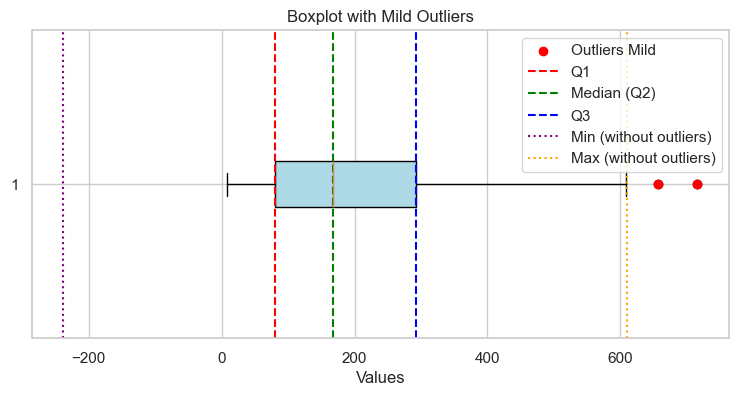

In [15]:
plot_custom_boxplot(Q1, Q2, Q3, data, IQR, outliers_type="mild")

Outliers Extreme: []


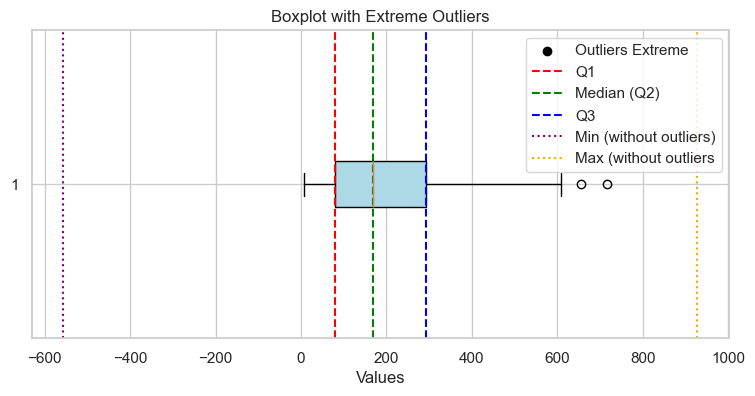

In [16]:
plot_custom_boxplot(Q1, Q2, Q3, data, IQR, outliers_type="extreme")

#### **Step 4: Density Plot (Kernel Density Estimate - KDE Plot)**  
Overlay a density plot to better understand the shape of the distribution.

In [36]:
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde

def plot_custom_histogram_with_kde(data: np.array, 
                                   intervals: np.array, 
                                   frequencies: np.array,
                                   edgecolor: str = "white",
                                   title: str = "Custom Histogram with KDE",
                                   figsize: tuple = (10, 6)) -> None:
    # Define bar widths
    widths = np.diff(intervals)

    # Normalize frequencies to represent densities
    total_samples = sum(frequencies)
    densities = frequencies / (total_samples * widths)

    # Create a color map based on density (Darker purple for high values)
    cmap = plt.cm.magma  # More contrast, deeper purples
    norm = plt.Normalize(min(densities), max(densities))
    colors = [cmap(norm(f)) for f in densities]

    # Create figure
    plt.figure(figsize=figsize)
    
    # Plot histogram with densities
    plt.bar(intervals[:-1], 
            densities, 
            width=widths, 
            color=colors, 
            edgecolor=edgecolor, 
            align='edge', 
            alpha=0.8,  # Slightly less transparency
            label="Histogram (Density)")

    # Compute KDE
    kde = gaussian_kde(data)
    x_vals = np.linspace(min(data), max(data), 200)
    kde_vals = kde(x_vals)
    
    # Find peaks in KDE
    peaks, _ = find_peaks(kde_vals)
    peak_values = x_vals[peaks]
    print("Detected peaks at:", peak_values)

    # Plot KDE with a soft but visible color
    plt.plot(x_vals, kde_vals, color='#FF8C00', lw=2, label="KDE (Estimated Density)")  # Dark orange for visibility

    # Customize plot
    plt.title(title)
    plt.xlabel("Values")
    plt.ylabel("Density")
    plt.xticks(intervals, rotation=0)
    plt.legend()

    # Add color bar for intensity reference
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label("Density Intensity")  

    # Show plot
    plt.show()


Detected peaks at: [114.73366834]


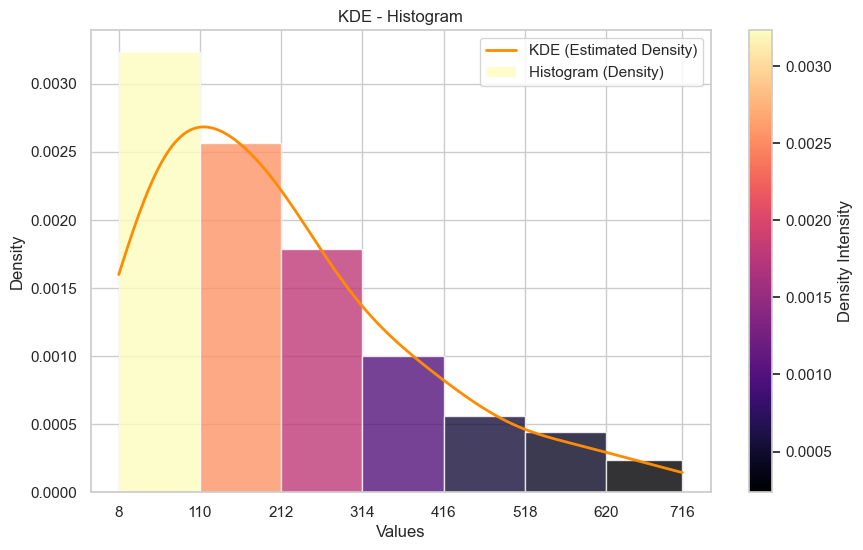

In [37]:
plot_custom_histogram_with_kde(data, statsD.intervals, statsD.abs_frequency, title="KDE - Histogram")

### **Analysis Questions:**  
1. What does the histogram reveal about the distribution of the data?
   
   **ans**: *The data are skewed to the right with positive skewness, indicating that transceivers fail are most frequent in the first bin range (~8 to 110 seconds). The density gradually decreases as failure times increase.*

2. Does the KDE plot suggest a normal or skewed distribution?
  
    **ans**: *skewed distribution (skewness: 1.05 > 0), has a long tail extending to higher values. (positively skewed)*

3. Are there any outliers in the box plot?
  
    **ans**: Yes, in the slight outliers, the values 656 and 716 were identified. These were identified based on IQR rule (1.5 x IQR for mild outliers).

4. If the data is skewed, what does this indicate about the central tendency?
  
   **ans**: The presence of extreme high values (long right tail) pulls the mean to be higher than the median and mode(positive skewed). Because mean > median > mode. 
   `Mean: 210.80, Median: 168.00, Mode: [ 72 168]`